In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_csv('heart_failure_clinical_records.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [4]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
4995,45.0,0,582,1,55,0,543000.0,1.0,132,0,0,250,0
4996,60.0,1,582,0,30,1,127000.0,0.9,145,0,0,95,0
4997,95.0,1,112,0,40,1,196000.0,1.0,138,0,0,24,1
4998,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
4999,40.0,0,244,0,45,1,275000.0,0.9,140,0,0,174,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


In [6]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
df.duplicated().sum()

3680

Distribution

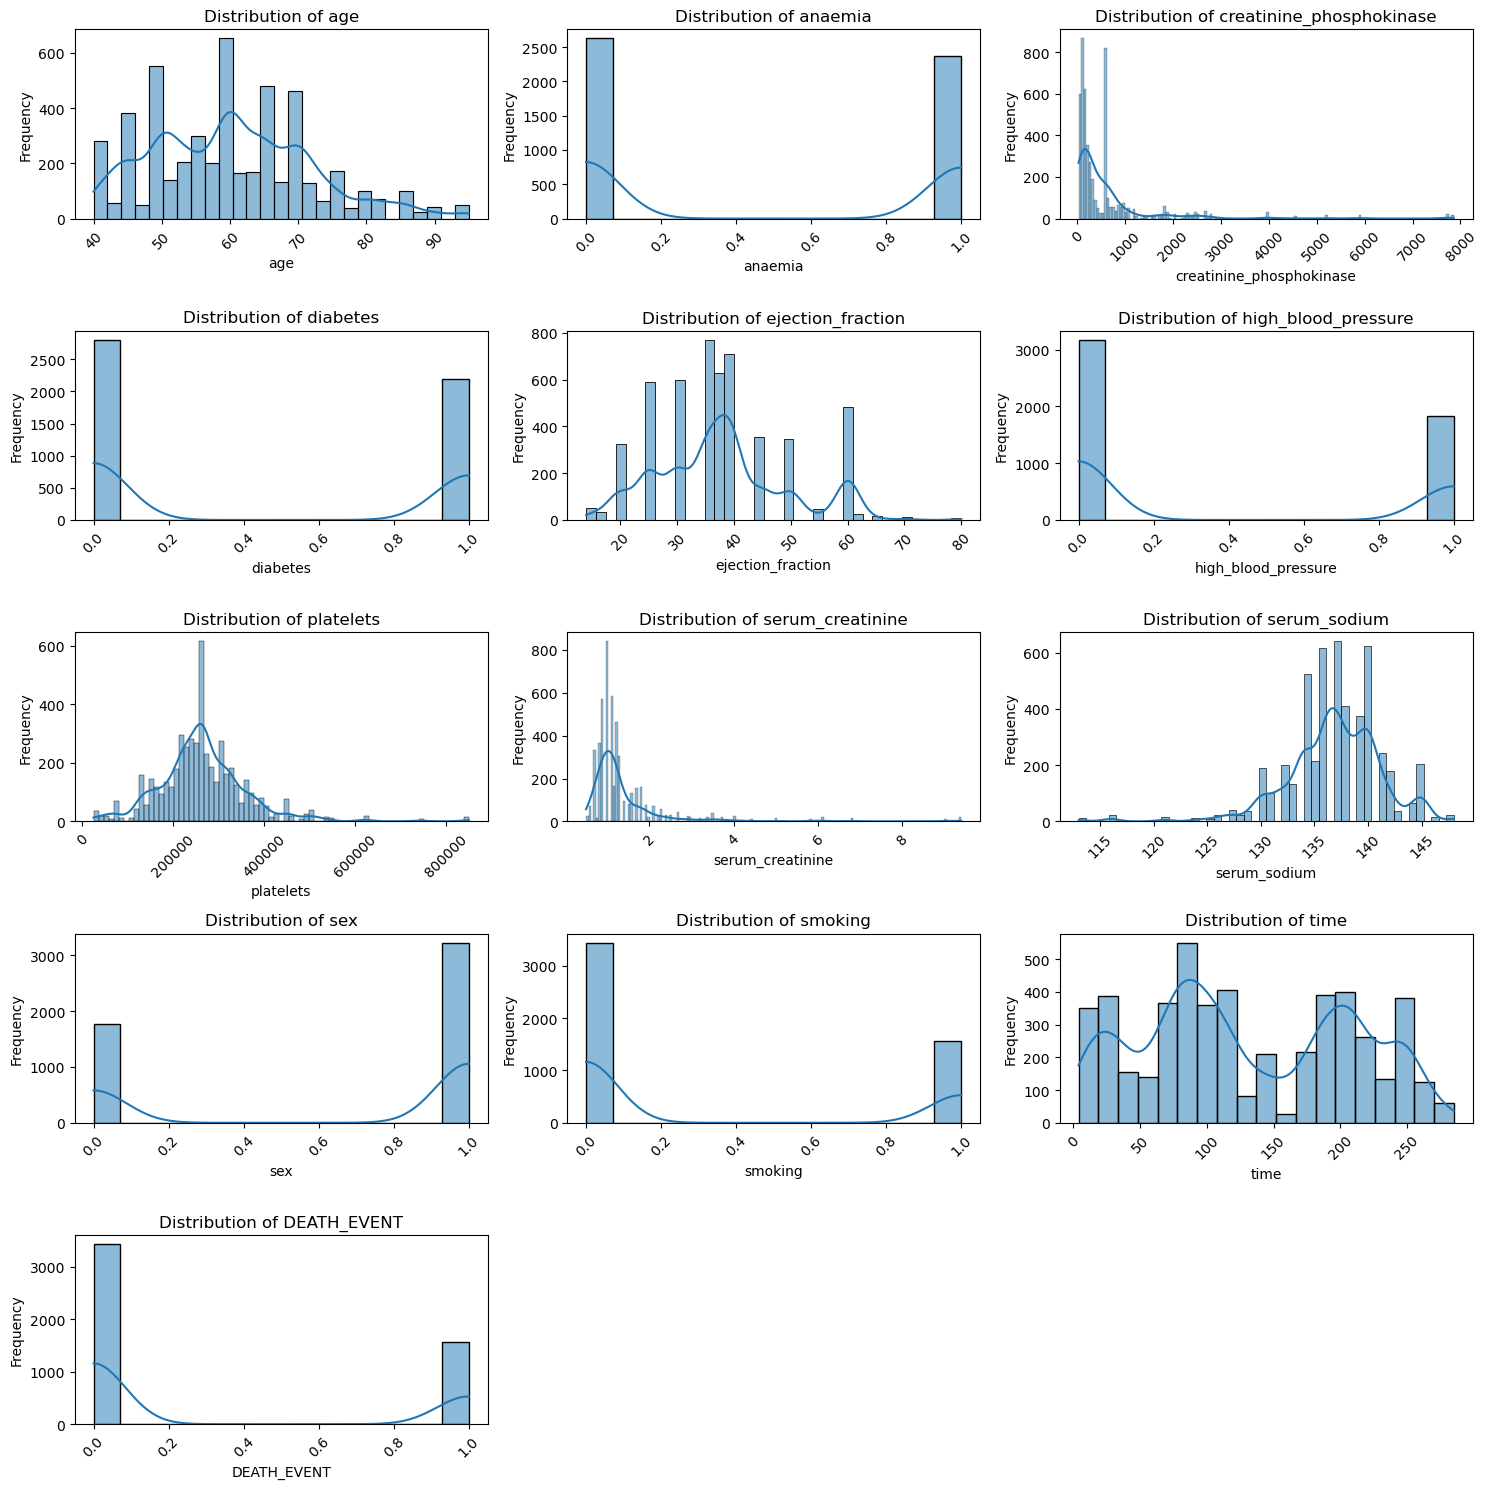

In [8]:
plt.figure(figsize=(15,15))
for i, column in enumerate(df):
    plt.subplot(5,3,i+1)
    sns.histplot(df[column],kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Outliers 

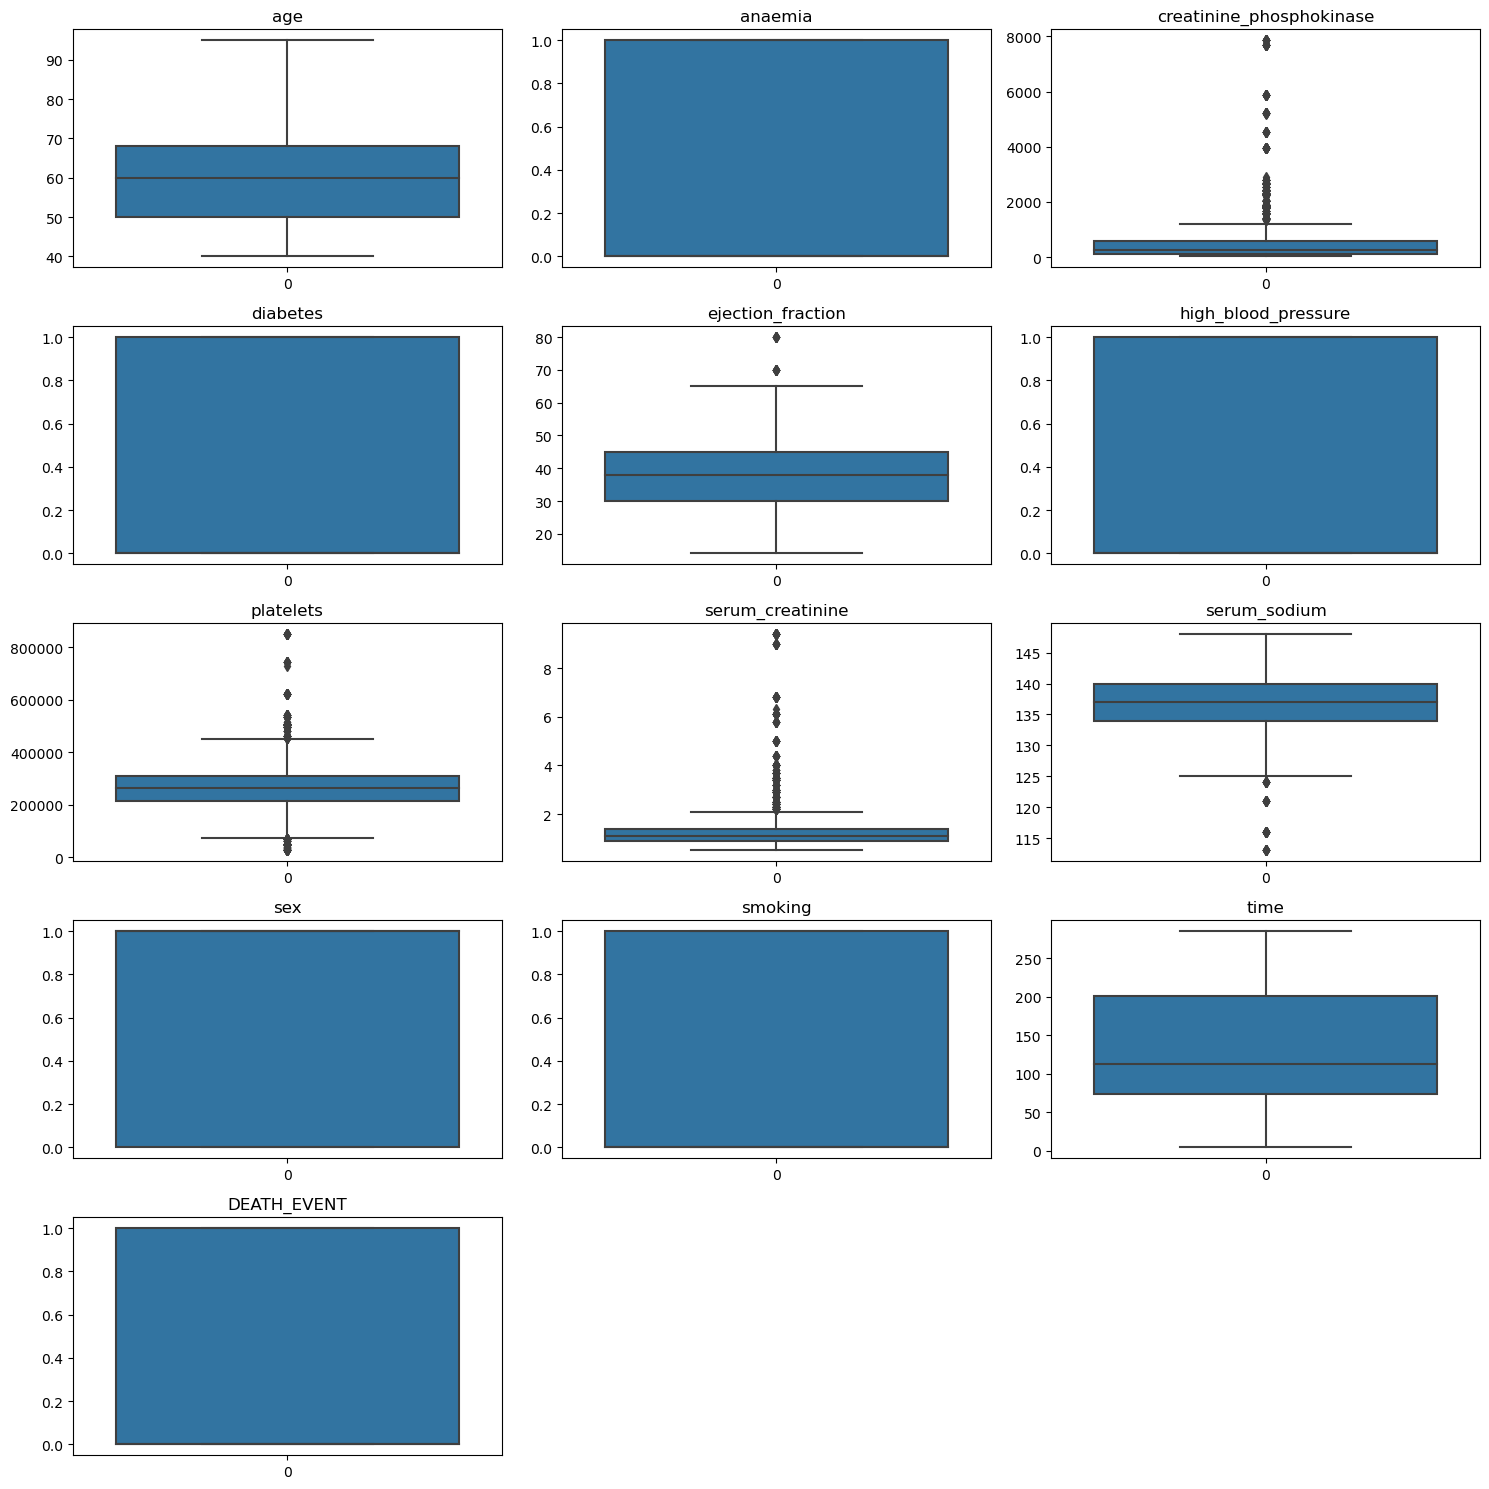

In [9]:
plt.figure(figsize=(15,15))
for i, column in enumerate(df):
    plt.subplot(5,3,i+1)
    sns.boxplot(df[column])
    plt.title(column)
plt.tight_layout()   
plt.show()


Outlier Detection using Z-Score

In [10]:
from scipy import stats
from scipy.stats import zscore


def check_outlier(column):
    z_scores = zscore(column)
    threshold = 3
    return abs(z_scores) > threshold

columns_without_outliers = df.apply(check_outlier)
columns_with_outliers = columns_without_outliers.any()  # This will give a Series of True/False values for each column
outlier_columns = columns_with_outliers[columns_with_outliers].index.tolist()  # Filter to get only columns with outliers

print("Columns with outliers:", outlier_columns)

Columns with outliers: ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']


Removing Outlier with Z Score

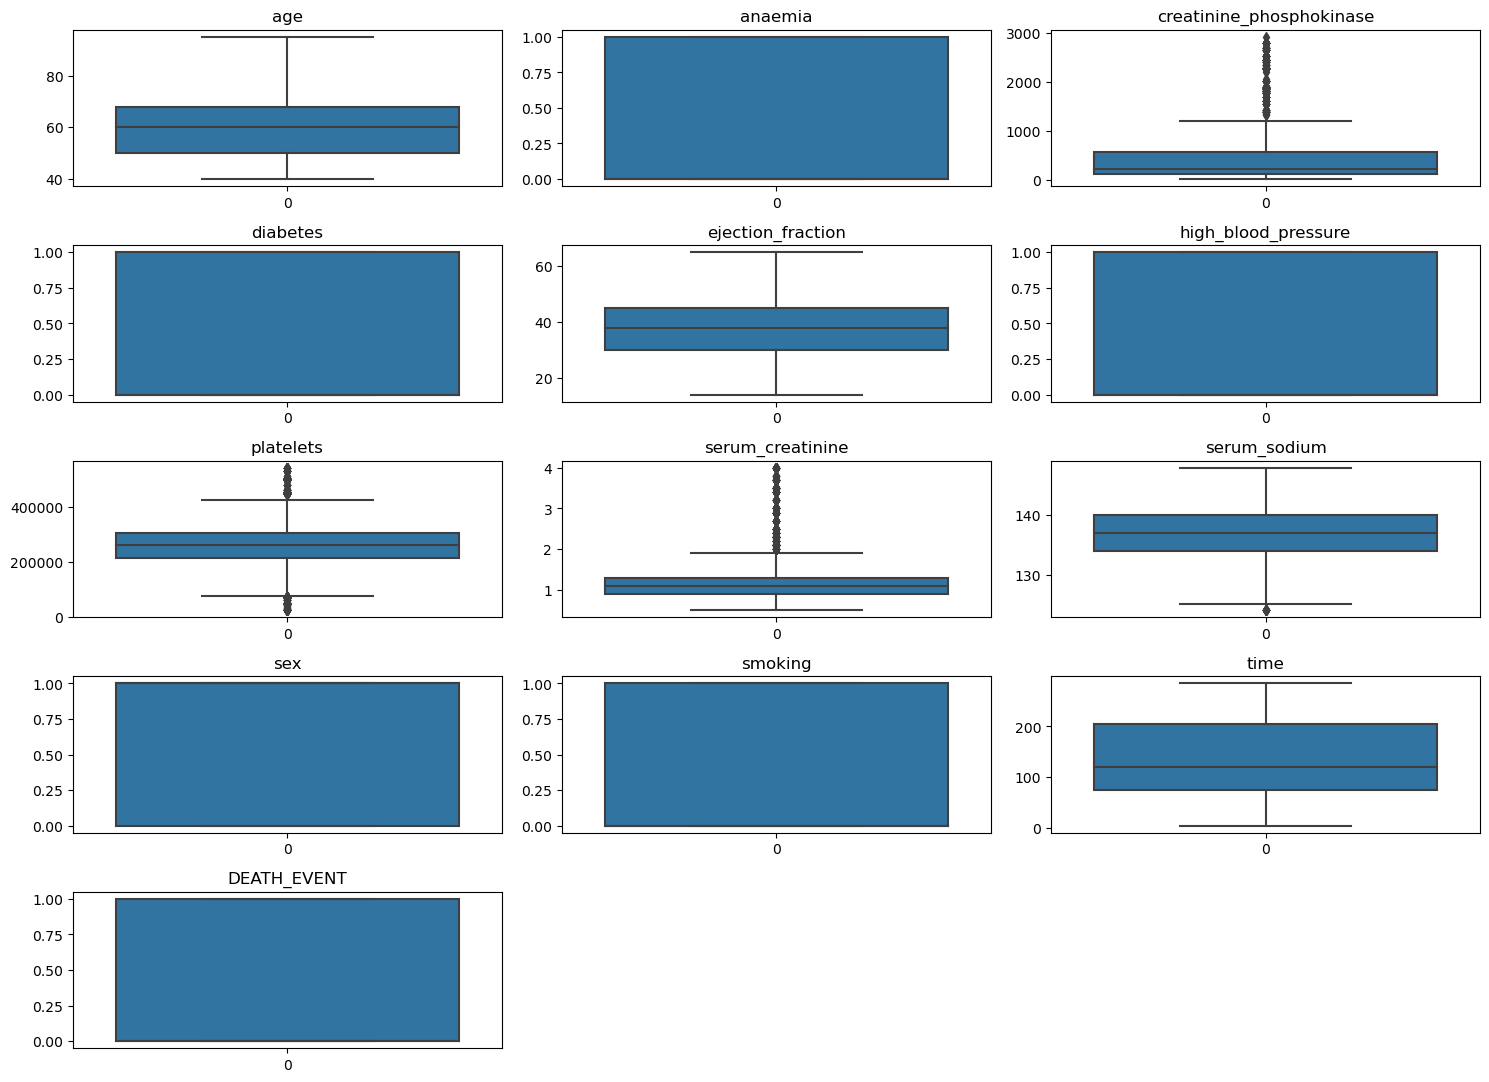

In [11]:
z_scores = zscore(df)
threshold = 3

outliers = (abs(z_scores) > threshold).any(axis=1)
df_filtered = df[~outliers]  # Select rows without outliers
num_cols=len(df_filtered.columns)
num_rows=(num_cols+1)//2
plt.figure(figsize=(15,15))
for i, column in enumerate(df_filtered.columns):
    plt.subplot(num_rows,3,i+1)
    sns.boxplot(df_filtered[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [12]:
df_clean = df_filtered.copy() 

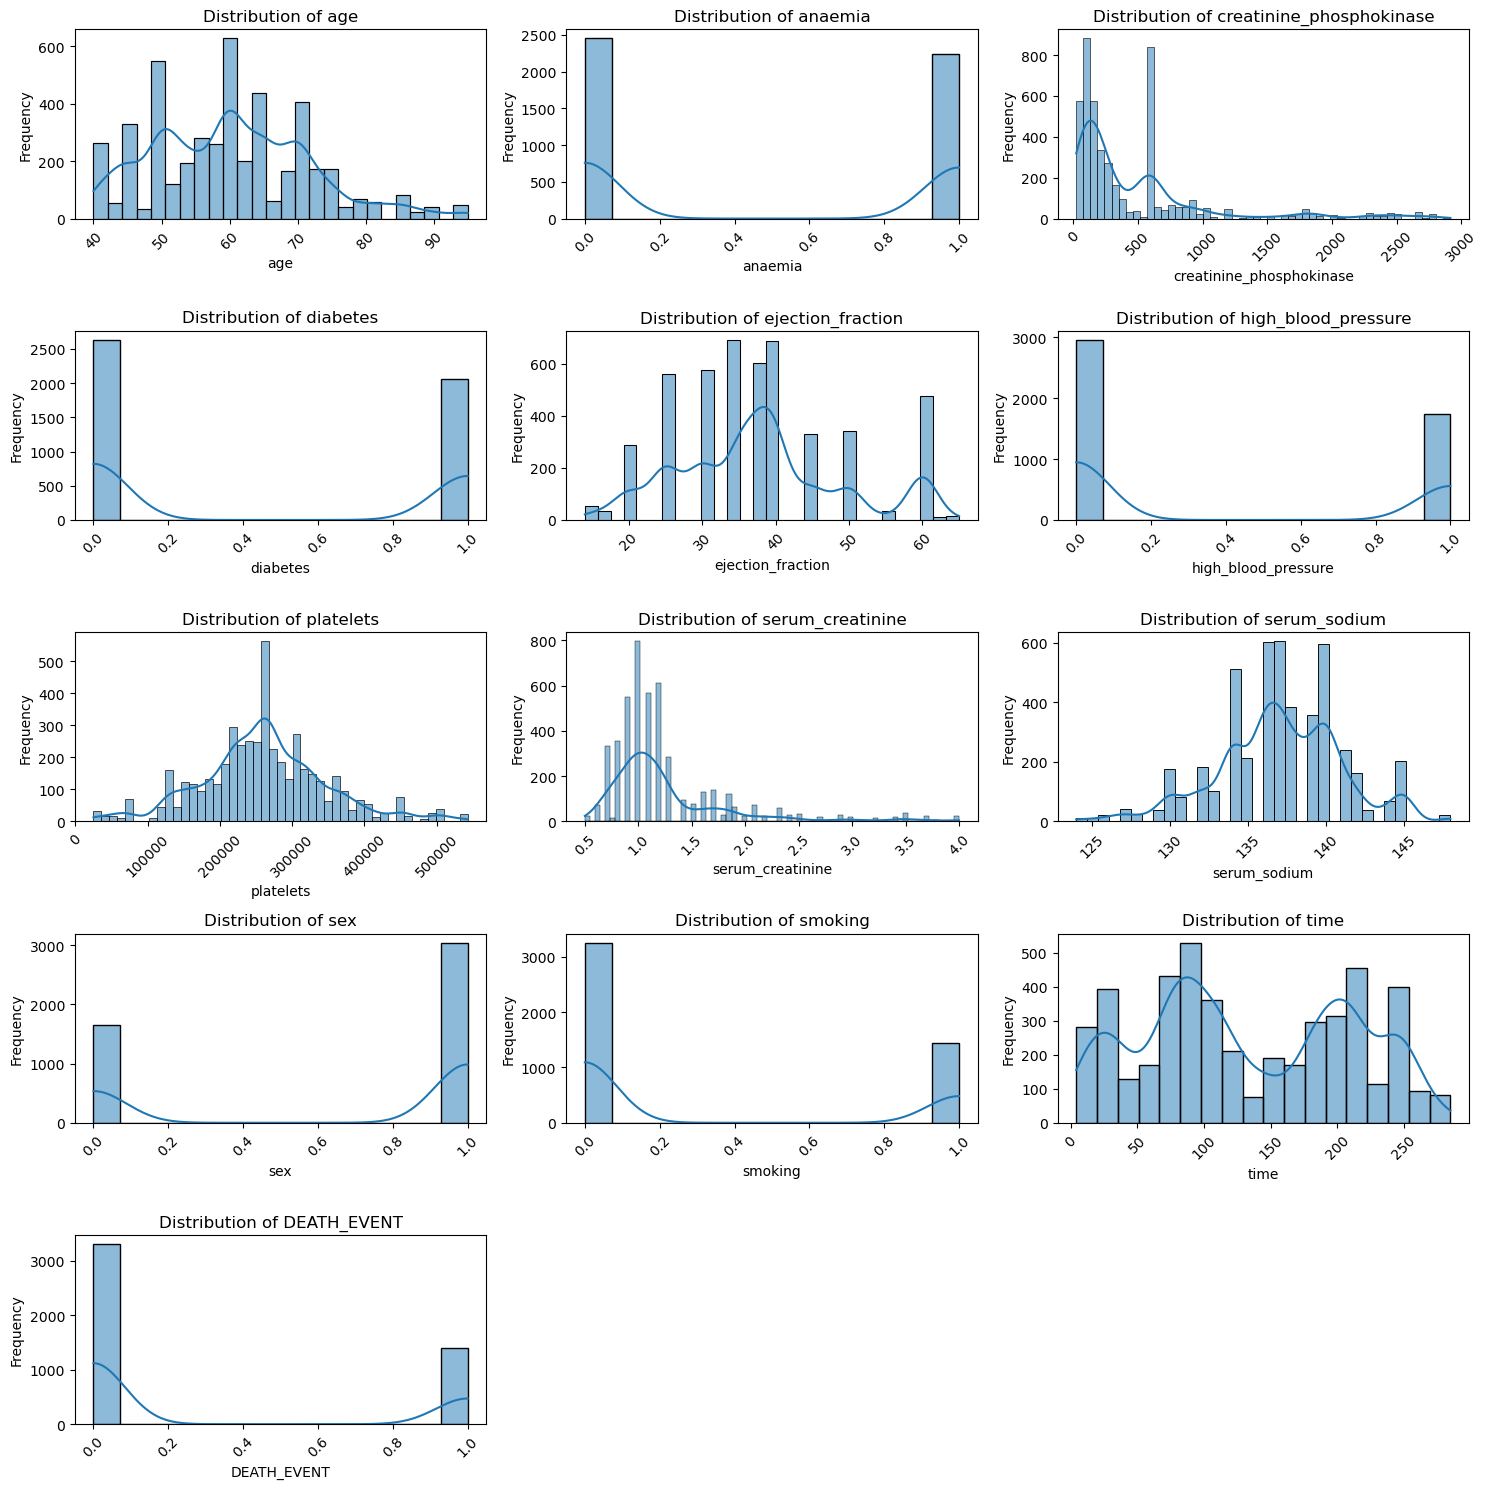

In [13]:
plt.figure(figsize=(15,15))
for i, column in enumerate(df_clean):
    plt.subplot(5,3,i+1)
    sns.histplot(df_clean[column],kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Model Development

In [14]:
X=df.drop(columns=['time','DEATH_EVENT'])
y=df[['DEATH_EVENT']].values

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [16]:
# Reshape target variables to 1D arrays
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [17]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [18]:
decisiontree_model = DecisionTreeClassifier(random_state=42)
svm_model=SVC(random_state=42)
logreg_model=LogisticRegression(random_state=42)
Naive_bayes_model=GaussianNB()
Knn_model=KNeighborsClassifier()
    

In [19]:
decisiontree_model.fit(X_train,y_train)
svm_model.fit(X_train,y_train)
logreg_model.fit(X_train,y_train)
Naive_bayes_model.fit(X_train,y_train)
Knn_model.fit(X_train,y_train)


KNeighborsClassifier()

In [20]:
y_pred_dt=decisiontree_model.predict(X_test)
y_pred_svm=svm_model.predict(X_test)
y_pred_logreg=logreg_model.predict(X_test)
y_pred_nb=Naive_bayes_model.predict(X_test)
y_pred_knn=Knn_model.predict(X_test)

In [21]:
accuracy_dt_model=accuracy_score(y_test,y_pred_dt)
accuracy_svm_model=accuracy_score(y_test,y_pred_svm)
accuracy_pred_logreg=accuracy_score(y_test,y_pred_logreg)
accuracy_pred_nb=accuracy_score(y_test,y_pred_nb)
accuracy_pred_knn=accuracy_score(y_test,y_pred_knn)

In [22]:
print(f" Decision Tree Model Accuracy: {accuracy_dt_model*100}%")
print(f" SVM Model Accuracy: {accuracy_svm_model*100}%")
print(f" Logistic Regression Model Accuracy: {accuracy_pred_logreg*100}%")
print(f" Naive Bayes Model Accuracy: {accuracy_pred_nb*100}%")
print(f" KNN Model Accuracy: {accuracy_pred_knn*100}%")

 Decision Tree Model Accuracy: 97.39999999999999%
 SVM Model Accuracy: 69.3%
 Logistic Regression Model Accuracy: 75.7%
 Naive Bayes Model Accuracy: 71.2%
 KNN Model Accuracy: 94.3%


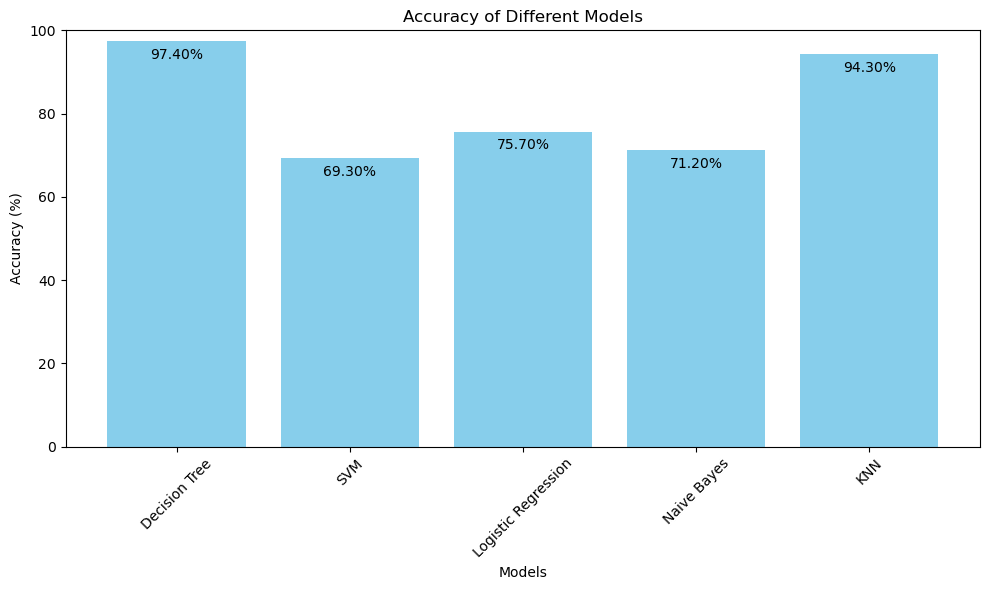

In [23]:
import matplotlib.pyplot as plt

models = ['Decision Tree', 'SVM', 'Logistic Regression', 'Naive Bayes', 'KNN']
accuracies = [accuracy_dt_model * 100, accuracy_svm_model * 100, accuracy_pred_logreg * 100, accuracy_pred_nb * 100, accuracy_pred_knn * 100]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Models')
plt.ylim(0, 100) 
plt.xticks(rotation=45)  

# Add value labels on the bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, f'{acc:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout() 
plt.show()

Decision Tree is perfroming well so i will do the hyper parameter tunning of decison tree using grid search

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
# Define the hyperparameters grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [26]:
# Create a decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

In [27]:
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')

In [28]:
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [29]:
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [30]:
best_model_accuracy = best_model.score(X_test, y_test)
print("Best Model Accuracy on Test Set:", best_model_accuracy)

Best Model Accuracy on Test Set: 0.976


Confusion Matrix and Classification Report

In [31]:
from sklearn.metrics import confusion_matrix, classification_report


In [32]:
y_pred = best_model.predict(X_test)

In [33]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[685   8]
 [ 16 291]]


In [34]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       693
           1       0.97      0.95      0.96       307

    accuracy                           0.98      1000
   macro avg       0.98      0.97      0.97      1000
weighted avg       0.98      0.98      0.98      1000

